## UFood marketing case study 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
food = pd.read_csv(r'/home/are/Downloads/u_food_marketing.csv')

In [7]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [11]:
pd.set_option('display.max.columns', 40)
pd.set_option('display.max.rows', 2300)

In [19]:
food.drop_duplicates(keep = False, inplace = True)

In [23]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [35]:
food['total_children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)

In [37]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})

In [39]:
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})

In [41]:
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})

In [43]:
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})

In [45]:
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [47]:
food['marital_status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)

In [49]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [51]:
food['marital_status_str'] = food['marital_status'].map({5: 'Divorced', 4: 'Married', 3:'Single',2:'Together',1:'Widow'})

In [55]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [57]:
food['education_status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)

In [89]:
food['accepted_campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].sum(axis = 1)

In [225]:
food['accepted_campaigns'] = (food['accepted_campaigns']!=0).astype(bool)

In [73]:
food.corr(method = 'pearson', numeric_only = True).sort_values()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

<Axes: >

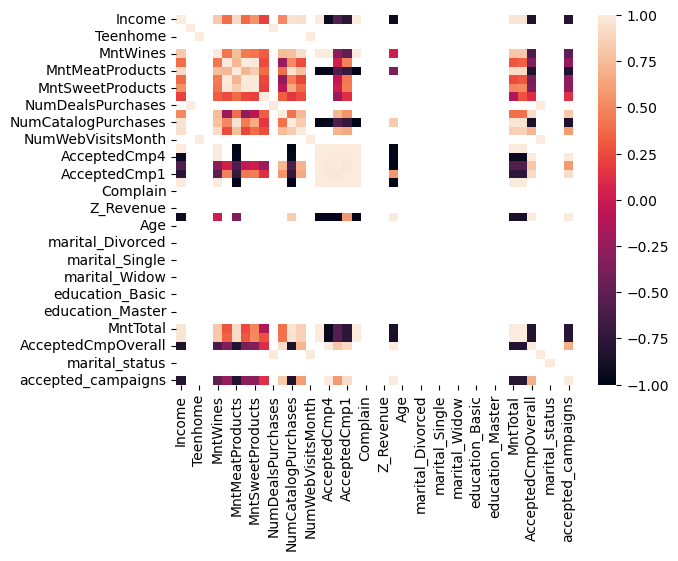

In [91]:
all_corr = food.corr(method = 'pearson', numeric_only = True)
all_corr = all_corr[(all_corr > 0.3) & (all_corr < 1)]

sns.heatmap(all_corr.corr(method = 'pearson', numeric_only = True))

In [93]:
all_corr['accepted_campaigns']

Income                  0.362983
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.469328
MntFruits                    NaN
MntMeatProducts         0.342145
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.369332
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.428455
AcceptedCmp4            0.521582
AcceptedCmp5            0.667235
AcceptedCmp1            0.642555
AcceptedCmp2            0.417459
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.723803
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [101]:
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

def assign_age_group(age):
    for age_range in age_groups:
        if age_range[0] <= age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return('Unknown')

food['age_group'] = food['Age'].apply(assign_age_group)

In [103]:
food[['Age', 'age_group']].head()

,Age,age_group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='age_group', ylabel='accepted_campaigns'>

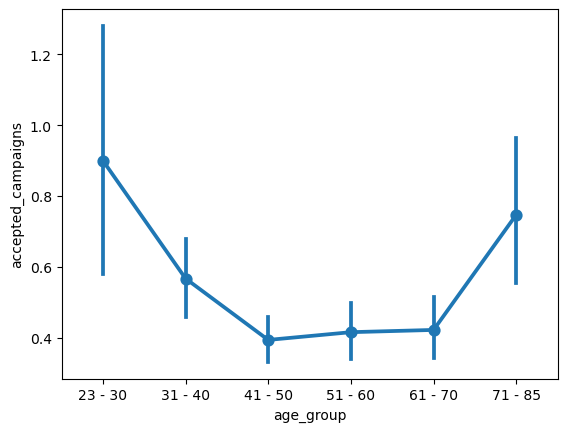

In [107]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']

sns.pointplot(data = food, x = 'age_group', y = 'accepted_campaigns', order = age_order)

In [144]:
counts = food['age_group'].value_counts()

In [115]:
percentage = counts / food.shape[0]

In [121]:
percent_food = percentage.reset_index()

In [123]:
percent_food.columns = ['age_group', 'percentage']

In [131]:
percent_food.sort_values(by = 'age_group', inplace = True)

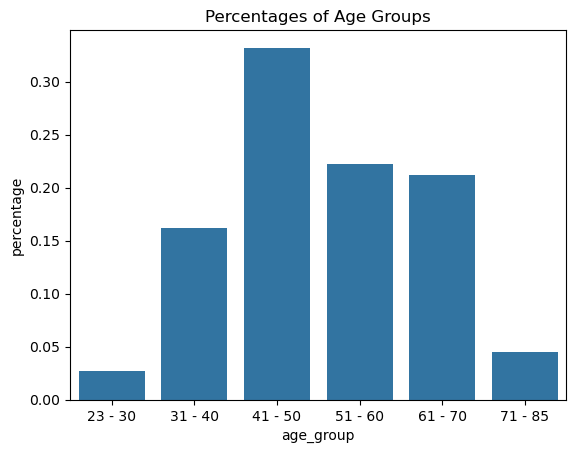

In [139]:
sns.barplot(data = percent_food, x = 'age_group', y = 'percentage' )
plt.title('Percentages of Age Groups')
plt.show()

The amount of ppl in the age groups (23-30) and (71-85) is lower than the other groups, so that is why there is uncertainty with the accpeted campaigns for the respected groups.

In [146]:
food['age_group'].value_counts()

age_group
41 - 50    612
51 - 60    409
61 - 70    391
31 - 40    298
71 - 85     83
23 - 30     50
Name: count, dtype: int64

In [156]:
grouped_food = food.groupby('age_group')['MntTotal'].sum().reset_index()

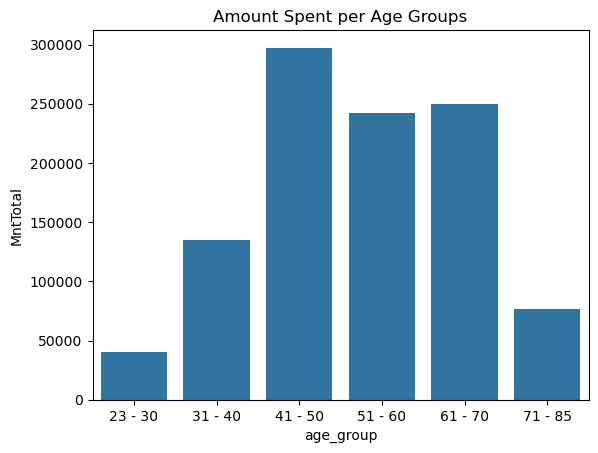

In [158]:
sns.barplot(data = grouped_food, x = 'age_group', y = 'MntTotal' )
plt.title('Amount Spent per Age Groups')
plt.show()

# 23-30 and 71-85 age groups are accepting campaigns greater, but there is some uncertainty

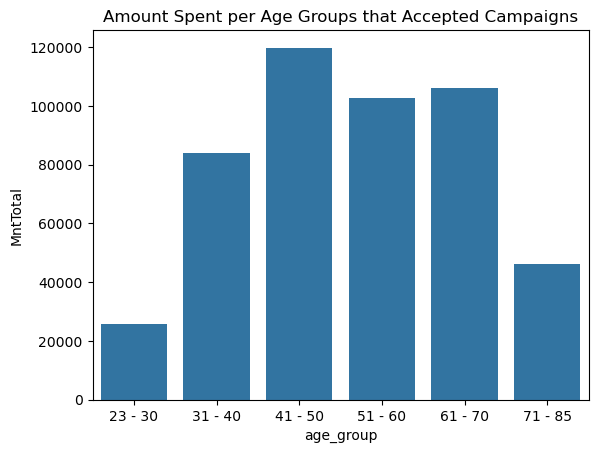

In [163]:
acc_camp = food[food['accepted_campaigns'] != 0]
grouped_food_acc = acc_camp.groupby('age_group')['MntTotal'].sum().reset_index()
sns.barplot(data = grouped_food_acc, x = 'age_group', y = 'MntTotal' )
plt.title('Amount Spent per Age Groups that Accepted Campaigns')
plt.show()

In [165]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status_str,education_status,accepted_campaigns,age_group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0,31 - 40


In [182]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['sum'])

In [184]:
sum_food = sum_food.reset_index()

In [190]:
sum_food.rename(columns = {'index' : 'type_of_purchase'}, inplace = True)

<Axes: xlabel='type_of_purchase', ylabel='sum'>

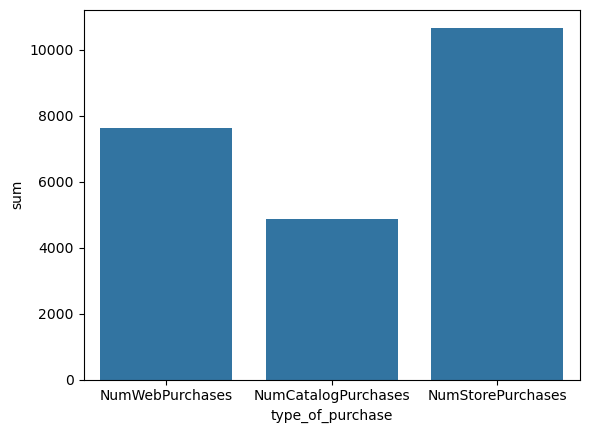

In [192]:
sns.barplot(x = 'type_of_purchase', y = 'sum', data = sum_food)

<Axes: xlabel='type_of_purchase', ylabel='sum'>

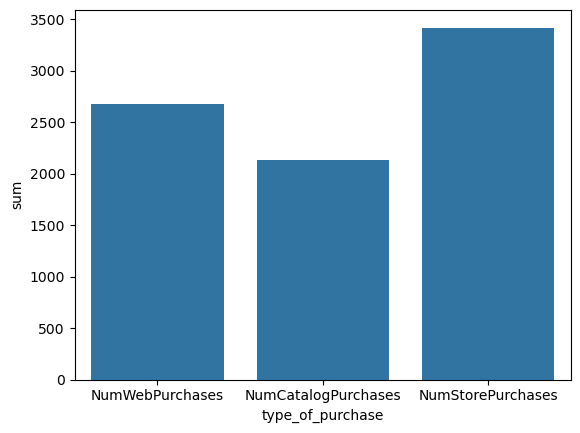

In [196]:
acc_camp = food[food['accepted_campaigns'] != 0]


sum_food = pd.DataFrame(acc_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index' : 'type_of_purchase'}, inplace = True)
sns.barplot(x = 'type_of_purchase', y = 'sum', data = sum_food)

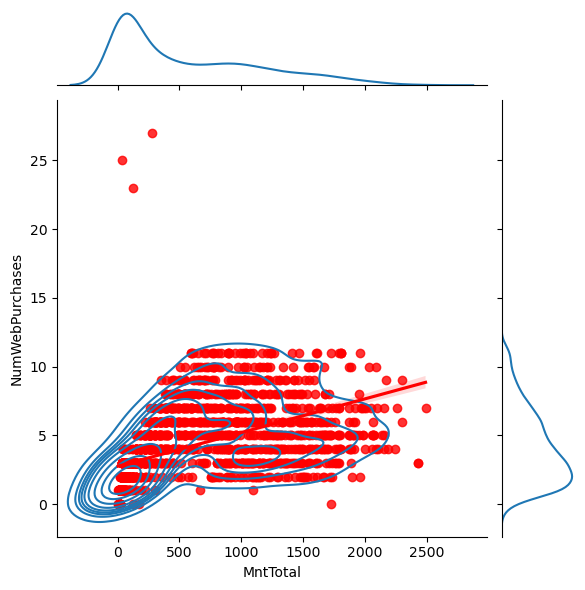

In [204]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

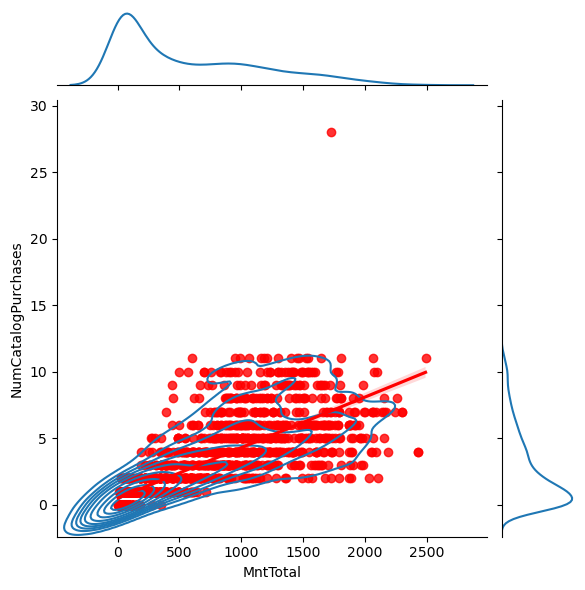

In [206]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

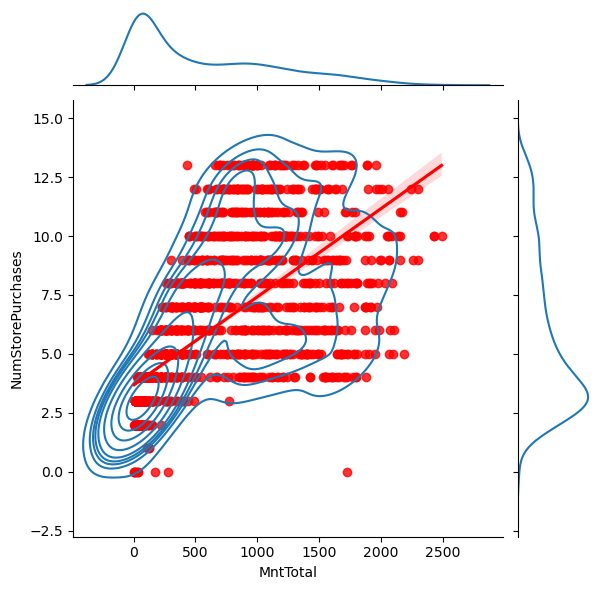

In [208]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

## A lot of ppl shop in store, dont accept campaigns. Not a lot shop in catalog, but accept campaigns a lot more

Boost up the higher percentage catalog customers, or focus on in store/web (they have more traffic).

<Axes: xlabel='total_children', ylabel='MntTotal'>

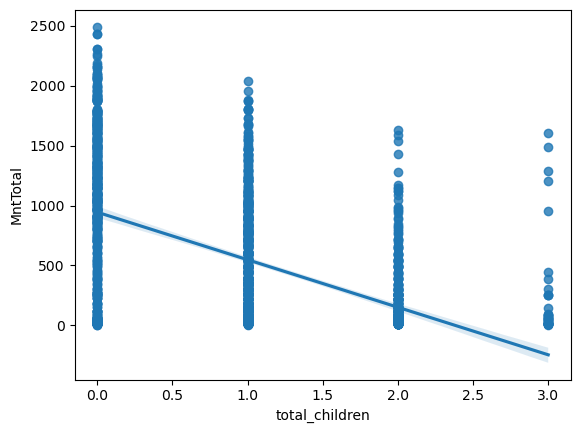

In [220]:
sns.regplot(x = 'total_children', y = 'MntTotal', data = food)

As ppl are having more children they spend less money

<Axes: xlabel='total_children', ylabel='accepted_campaigns'>

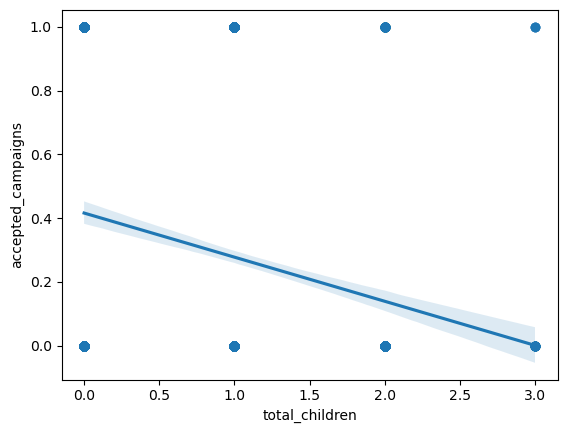

In [227]:
sns.regplot(x = 'total_children', y = 'accepted_campaigns', data = food)

People with more kids are less likely to accept campaigns

<Axes: xlabel='education_status', ylabel='accepted_campaigns'>

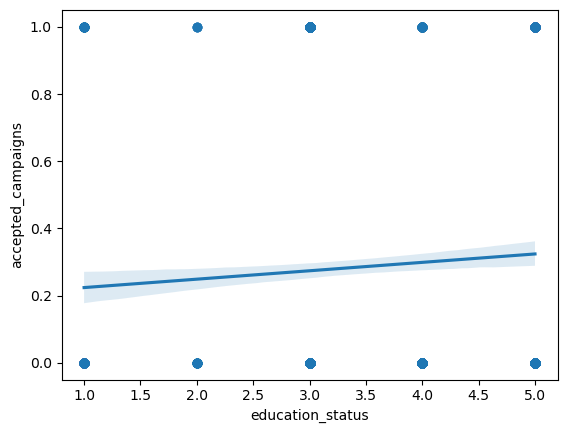

In [231]:
sns.regplot(x = 'education_status', y = 'accepted_campaigns', data = food)

more educated people are accpeting campaigns

<Axes: xlabel='education_status', ylabel='MntTotal'>

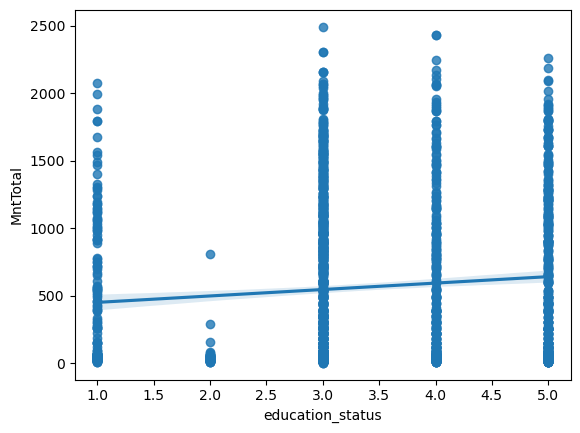

In [234]:
sns.regplot(x = 'education_status', y = 'MntTotal', data = food)

people with better education spend more on average, education isn't really significant on segmentation

<Axes: xlabel='marital_status_str', ylabel='count'>

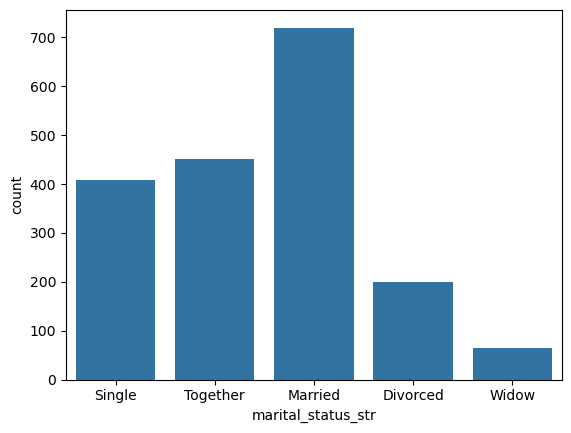

In [237]:
sns.countplot(x = 'marital_status_str', data = food)

More people married than other categories

<Axes: xlabel='marital_status', ylabel='MntTotal'>

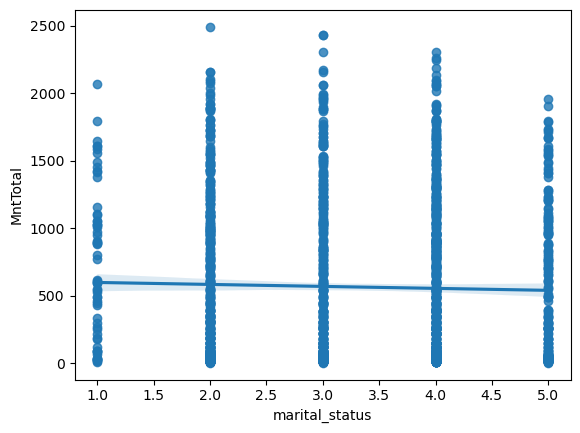

In [239]:
sns.regplot(x = 'marital_status', y = 'MntTotal', data = food)

Amount spent for marital status isn't correlated

<Axes: xlabel='marital_status', ylabel='accepted_campaigns'>

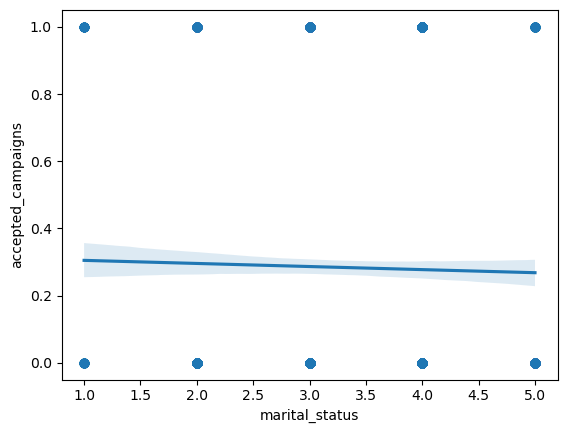

In [244]:
sns.regplot(x = 'marital_status', y = 'accepted_campaigns', data = food)

In [254]:
rel_food = food.groupby('marital_status_str')['MntTotal'].sum().reset_index()

<Axes: xlabel='marital_status_str', ylabel='MntTotal'>

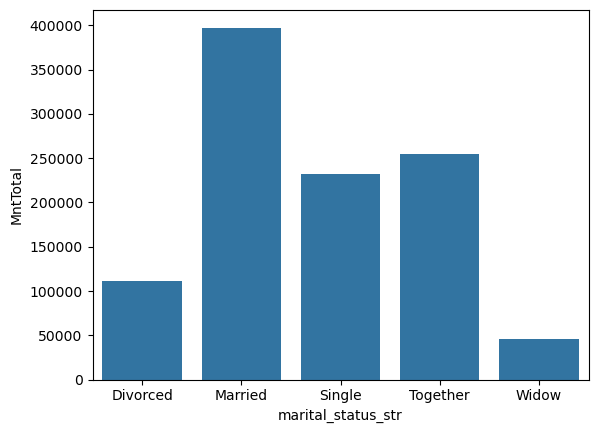

In [256]:
sns.barplot(x = 'marital_status_str', y = 'MntTotal', data = rel_food)

married people spent more (there are a large amount of married people)

<Axes: xlabel='marital_status_str', ylabel='MntTotal'>

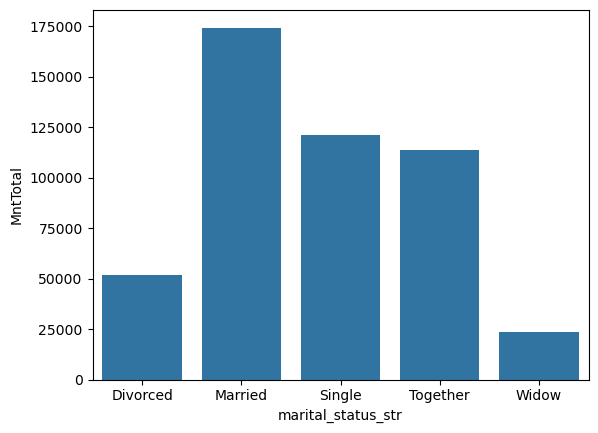

In [259]:
accpt = food[food['accepted_campaigns'] != 0]

acc_rel_food = accpt.groupby('marital_status_str')['MntTotal'].sum().reset_index()
sns.barplot(x = 'marital_status_str', y = 'MntTotal', data = acc_rel_food)

In [278]:
tot = food['marital_status_str'].value_counts()
acc = accpt['marital_status_str'].value_counts()

In [292]:
pct_marital = acc/tot * 100

In [294]:
pct_food = pct_marital.reset_index()

In [298]:
pct_food.columns = ['marital_status', 'percentage']
pct_food

,marital_status,percentage
0,Divorced,28.643216
1,Married,26.111111
2,Single,32.762836
3,Together,26.607539
4,Widow,37.500000


<Axes: xlabel='marital_status', ylabel='percentage'>

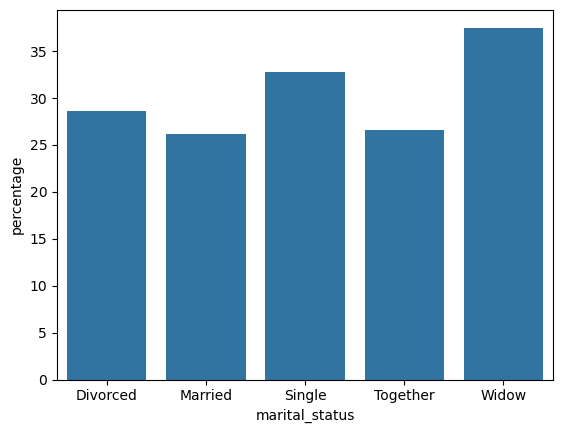

In [302]:
sns.barplot(x = 'marital_status', y = 'percentage', data = pct_food)

Single People who did accept campaigns spent more money than together, different than the general graph

Married, single, and together groups spend the most in general and with those that acceepted campaigns. We should focus on this segment

# Overall Findings

### 1. Age 30-70 were spending more money but less likely to accept campaigns. Higher volume here
### 2. Catalog was more likely to accept campaigns, but in person spend more. Recommend a split between all. (Web is good, but catalog was accepting more campaigns. Higher margin for catalog: 40% catalog, 30% store and 30% web) Hopefully catalog would spend more money after that
### 3. Focus on people with less or no kids. They accept campaigns and spend more money
### 4. Education - no impact - dont target any specific group
### 5. Marital status doesnt play a big part. Married Singple Together spend more money

# Money Making 

1. Middle Aged People, high earners, with no kids. Target on different platforms with above split (40,30,30)

# New Users 

2. Focus on 21-30 and 70+ - statistically accepted campaigns at a higher rate